In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Edu-Data.csv")
encode = LabelEncoder()

In [3]:
#dataset for my project
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Vistualizing Dataset by plotting Correlation Matrix
# So as we can see that correlation between these catagorical points are lying between range of 0.34 to 0.69 which is quite okay to deal with it, if it was near to .80 or .90 then we have to discard one of the feature from our dataset inorder to prevent overfitting 


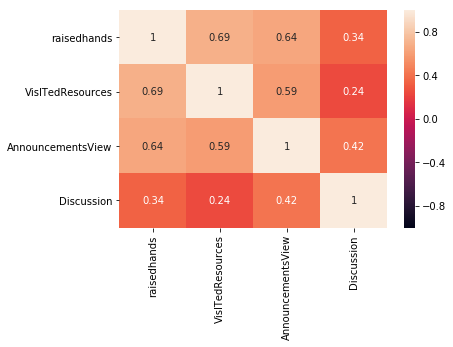

In [4]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True)

In [5]:
data.drop('GradeID',inplace=True,axis=1)

In [6]:
data.drop('Relation',inplace=True,axis=1)

In [7]:
data.drop('SectionID',inplace=True,axis=1)

In [8]:
#Target class
y = data['Class']
y1=data['StageID']
y2=data['StudentAbsenceDays']

# These are the three classes upon which i can do classification on the basis of its distribution. 

In [9]:
Y = encode.fit_transform(y)
Y_s = encode.fit_transform(y1)
Y_a = encode.fit_transform(y2)

# Distribution of my targeted class here Label 0: low level student , Label 1: Medium Level, Label 2 : high level student

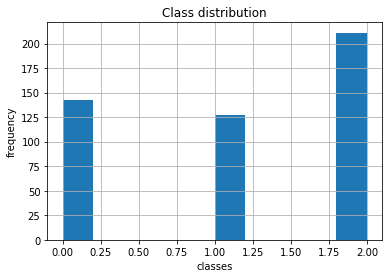

In [10]:
plt.hist(Y)
plt.title("Class distribution")
plt.xlabel("classes")
plt.ylabel("frequency")
plt.grid()
plt.show()

# Different student belonging to different level of school i.e low level , Middle school and high school

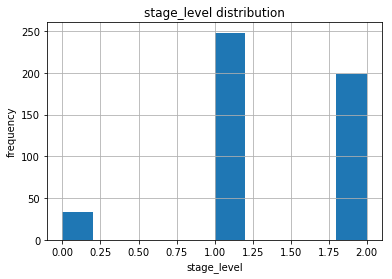

In [11]:
plt.hist(Y_s)
plt.title("stage_level distribution")
plt.xlabel("stage_level")
plt.ylabel("frequency")
plt.grid()
plt.show()

# Vistualizing the data which is related to level of performance of students here : Label 0:Under-7 days and Label 1 : Above-7 days

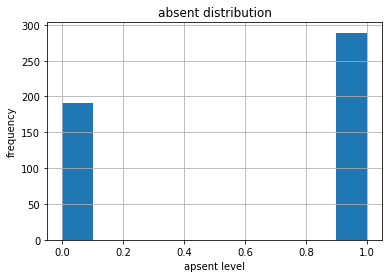

In [12]:
plt.hist(Y_a)
plt.title("absent distribution")
plt.xlabel("apsent level")
plt.ylabel("frequency")
plt.grid()
plt.show()

In [30]:
X = data.iloc[:,0:13]

In [31]:
X['gender']=encode.fit_transform(X['gender'])
X['NationalITy']=encode.fit_transform(X['NationalITy'])
X['PlaceofBirth']=encode.fit_transform(X['PlaceofBirth'])
X['StageID']=encode.fit_transform(X['StageID'])
X['Topic']=encode.fit_transform(X['Topic'])
X['Semester']=encode.fit_transform(X['Semester'])
X['ParentAnsweringSurvey']=encode.fit_transform(X['ParentAnsweringSurvey'])
X['ParentschoolSatisfaction']=encode.fit_transform(X['ParentschoolSatisfaction'])
X['StudentAbsenceDays']=encode.fit_transform(X['StudentAbsenceDays'])

In [77]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [43]:
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.3,random_state=0)

In [44]:
xtrain.shape,xtest.shape

((336, 13), (144, 13))

# Ensembling technique is used to develop this model and i have used target as feature name class for training of model

# Here targets are the level of academic i.e. Low, Medium, High

In [71]:
esm=[]

In [72]:
esm.append(('svc',SVC(gamma='auto')))
esm.append(('rfc',RandomForestClassifier(n_estimators=100)))
esm.append(('ext',ExtraTreesClassifier(n_estimators=100)))
esm.append(('dtc',DecisionTreeClassifier()))

In [87]:
clf = VotingClassifier(esm,voting='hard',weights=[440,820,1020,1060])

In [95]:
clf.fit(xtrain,ytrain) #classifier for model

VotingClassifier(estimators=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('rfc', RandomForestClassifier(bootstrap=True, class_...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard',
         weights=[440, 820, 1020, 1060])

In [ ]:
clf.score(xtrain,ytrain)

In [89]:
pred = clf.predict(xtest)

In [90]:
print(accuracy_score(ytest,pred))

0.7847222222222222


# Plotting predicted class

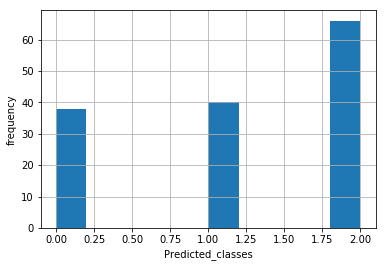

In [94]:
plt.hist(pred)
plt.xlabel('Predicted_classes')
plt.ylabel('frequency')
plt.grid()
plt.show()

# Classification Report of this model

In [96]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        39
           1       0.80      0.94      0.86        34
           2       0.80      0.75      0.77        71

   micro avg       0.78      0.78      0.78       144
   macro avg       0.78      0.80      0.79       144
weighted avg       0.78      0.78      0.78       144



In [ ]:
## model prepared ##